# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ballina
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | vostok
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | ponta delgada
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | pochutla
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | atherton
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | wanning
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | muzhi
Processing Record 20 of Set 1 | cody
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | bambous virieux
Processing Record 23 of Set 1 | saint-philippe
P

Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | east london
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | metro
Processing Record 41 of Set 4 | tucuma
Processing Record 42 of Set 4 | acapulco
Processing Record 43 of Set 4 | walvis bay
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | manakara
Processing Record 46 of Set 4 | tasiilaq
Processing Record 47 of Set 4 | dubovskoye
Processing Record 48 of Set 4 | saiha
Processing Record 49 of Set 4 | karimganj
Processing Record 0 of Set 5 | lompoc
Processing Record 1 of Set 5 | sur
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | hoquiam
Processing Record 4 of Set 5 | hermanus
Processing Record 5 of Set 5 | atbasar
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | lolua
City not found. Skipping...
Processing Record 8 of Set 5 | kaa-khem
Processing Record 9 of Set 5 | breves
Processing Record 10 of Set 5 | meulaboh
Process

Processing Record 28 of Set 8 | pisco
Processing Record 29 of Set 8 | san borja
Processing Record 30 of Set 8 | warqla
City not found. Skipping...
Processing Record 31 of Set 8 | waiuku
Processing Record 32 of Set 8 | kuito
Processing Record 33 of Set 8 | kahta
Processing Record 34 of Set 8 | fortuna
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | conceicao do araguaia
Processing Record 37 of Set 8 | lucapa
Processing Record 38 of Set 8 | bogorodskoye
Processing Record 39 of Set 8 | kamenka
Processing Record 40 of Set 8 | juegang
Processing Record 41 of Set 8 | rudbar
Processing Record 42 of Set 8 | upata
Processing Record 43 of Set 8 | grand centre
City not found. Skipping...
Processing Record 44 of Set 8 | zamora
Processing Record 45 of Set 8 | kempele
Processing Record 46 of Set 8 | whitehorse
Processing Record 47 of Set 8 | rio grande
Processing Record 48 of Set 8 | iqaluit
Processing Record 49 of Set 8 | nichinan
Processing Record 0 of Set 9 | puerto baquerizo

Processing Record 19 of Set 12 | tanout
Processing Record 20 of Set 12 | basco
Processing Record 21 of Set 12 | amos
Processing Record 22 of Set 12 | itarema
Processing Record 23 of Set 12 | kununurra
Processing Record 24 of Set 12 | praia da vitoria
Processing Record 25 of Set 12 | yerbogachen
Processing Record 26 of Set 12 | cravinhos
Processing Record 27 of Set 12 | ulagan
Processing Record 28 of Set 12 | hami
Processing Record 29 of Set 12 | zhuhai
Processing Record 30 of Set 12 | hrinova
Processing Record 31 of Set 12 | kisaran
Processing Record 32 of Set 12 | senno
Processing Record 33 of Set 12 | podyuga
Processing Record 34 of Set 12 | leningradskiy
Processing Record 35 of Set 12 | taltal
Processing Record 36 of Set 12 | gorom-gorom
Processing Record 37 of Set 12 | thilogne
City not found. Skipping...
Processing Record 38 of Set 12 | katangli
Processing Record 39 of Set 12 | nantucket
Processing Record 40 of Set 12 | londoko
Processing Record 41 of Set 12 | anchorage
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ballina,-28.8667,153.5667,69.01,93,99,2.17,AU,1675704136
1,castro,-24.7911,-50.0119,78.93,49,54,5.03,BR,1675704137
2,ponta do sol,32.6667,-17.1000,64.71,54,7,7.40,PT,1675704138
3,vostok,46.4856,135.8833,-5.82,98,100,4.92,RU,1675704139
4,butaritari,3.0707,172.7902,79.90,83,100,17.60,KI,1675704139


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ballina,-28.8667,153.5667,69.01,93,99,2.17,AU,1675704136
1,castro,-24.7911,-50.0119,78.93,49,54,5.03,BR,1675704137
2,ponta do sol,32.6667,-17.1000,64.71,54,7,7.40,PT,1675704138
3,vostok,46.4856,135.8833,-5.82,98,100,4.92,RU,1675704139
4,butaritari,3.0707,172.7902,79.90,83,100,17.60,KI,1675704139


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

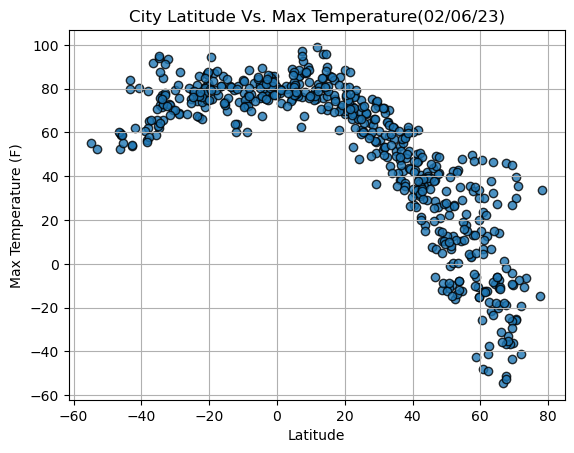

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

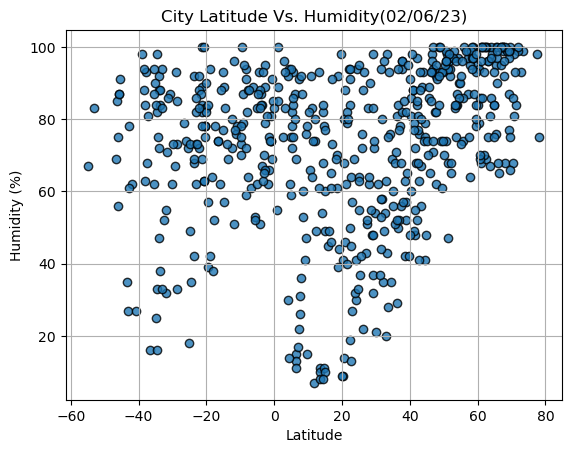

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

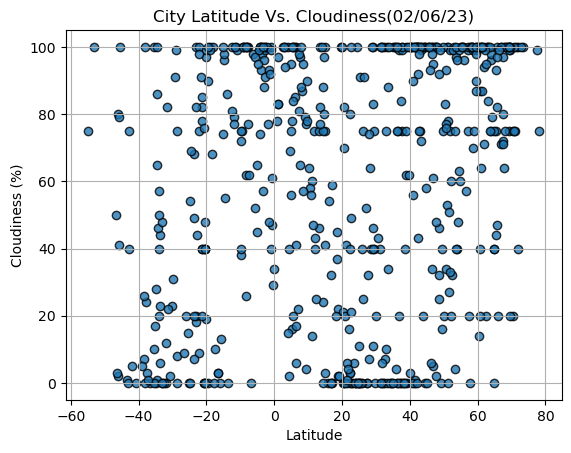

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

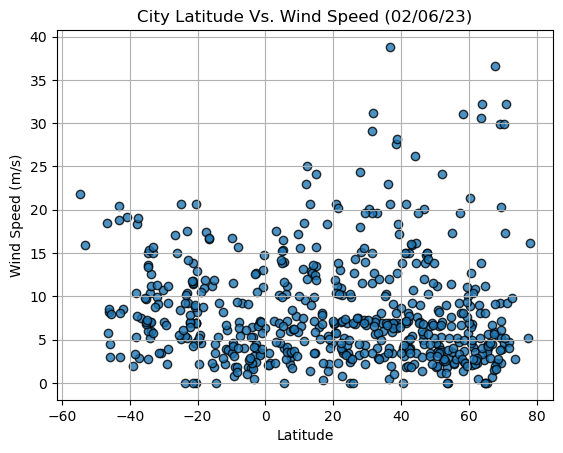

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    #today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    print(f"The r-value is: {rvalue**2}")

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ponta do sol,32.6667,-17.1000,64.71,54,7,7.40,PT,1675704138
3,vostok,46.4856,135.8833,-5.82,98,100,4.92,RU,1675704139
4,butaritari,3.0707,172.7902,79.90,83,100,17.60,KI,1675704139
5,ponta delgada,37.7333,-25.6667,57.92,94,75,6.91,PT,1675704140
6,ribeira grande,38.5167,-28.7000,61.20,63,40,27.63,PT,1675704140


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ballina,-28.8667,153.5667,69.01,93,99,2.17,AU,1675704136
1,castro,-24.7911,-50.0119,78.93,49,54,5.03,BR,1675704137
7,bredasdorp,-34.5322,20.0403,72.75,82,86,13.60,ZA,1675704141
13,ancud,-41.8697,-73.8203,62.06,62,5,8.52,CL,1675704144
14,atuona,-9.8000,-139.0333,78.15,73,38,16.75,PF,1675704144


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7732062105128271


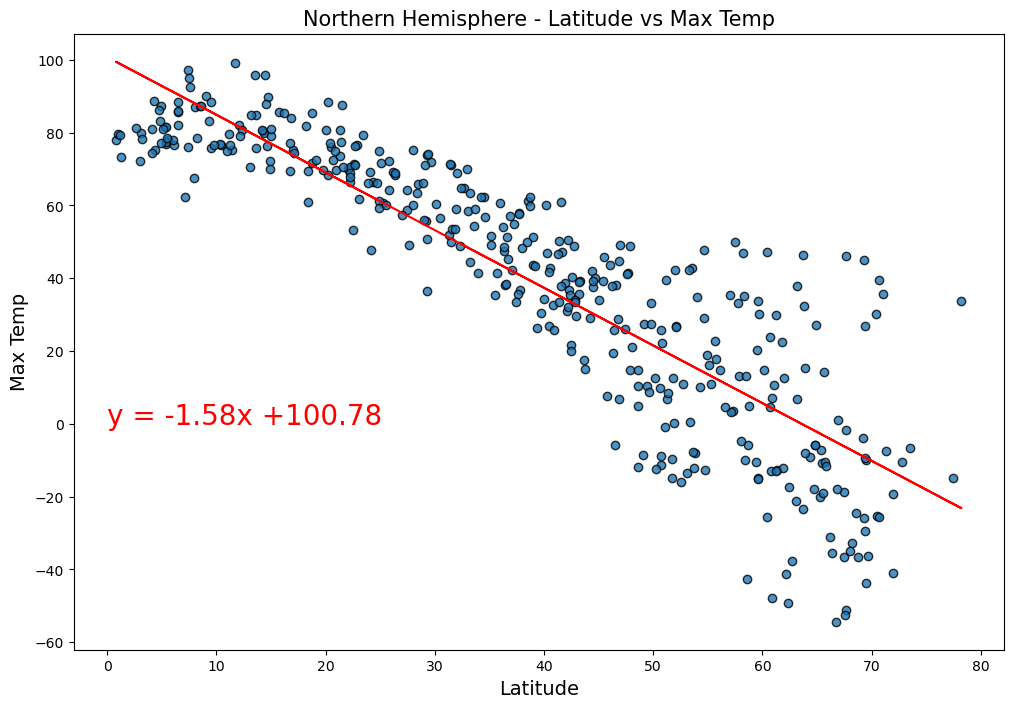

In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern",(0, 0))
plt.savefig('output_data/Northhemi Latitude vs. Max Temp.png')
plt.show()

The r-value is: 0.23042712863761197


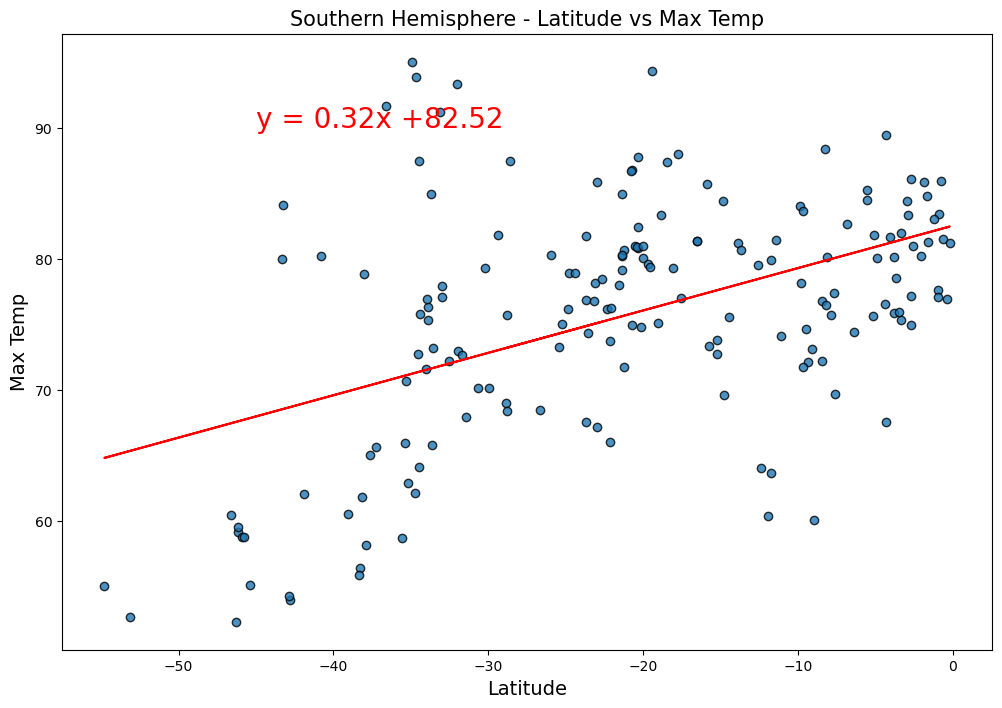

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern",(-45, 90))
plt.savefig('output_data/Southhemi Latitude vs. Max Temp.png')
plt.show()

**Discussion about the linear relationship:** The northern hemisphere has a positive strong correlation between latitude and max temperature. Moving away from the equator decreases temperature values. 
The southern hemisphere has a weak correlation but as you get closer to the equator the temperature rises.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.24384406782861115


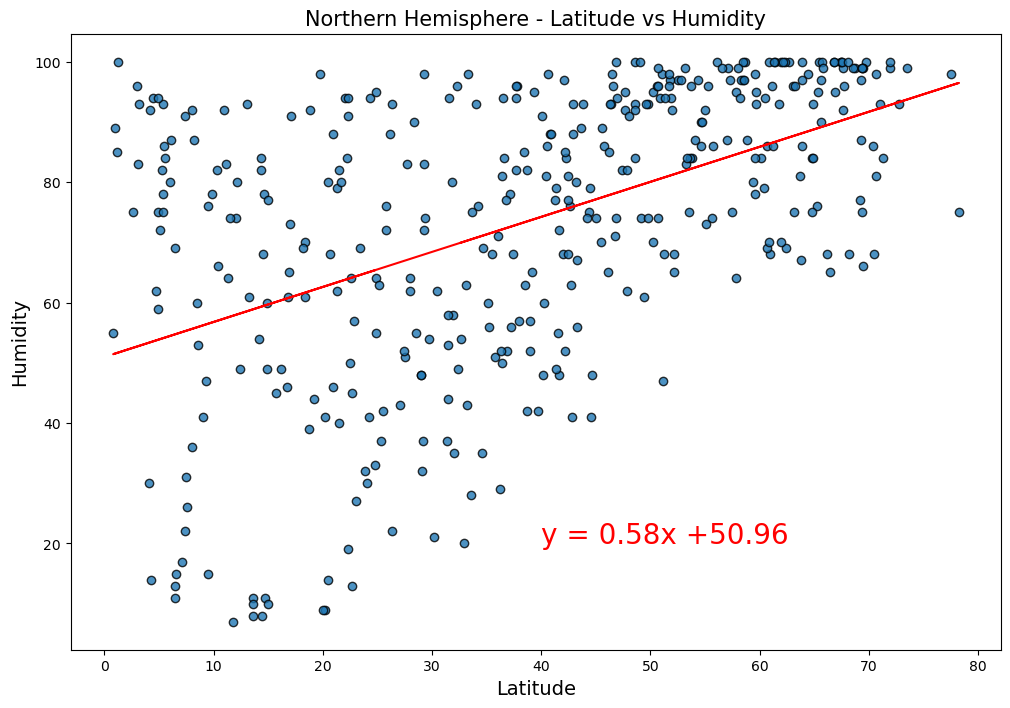

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression(x_values, y_values, "Latitude", "Humidity", "Northern",(40, 20))
plt.savefig('output_data/Northhemi Latitude vs. Humidity.png')
plt.show()

The r-value is: 0.029375071955981335


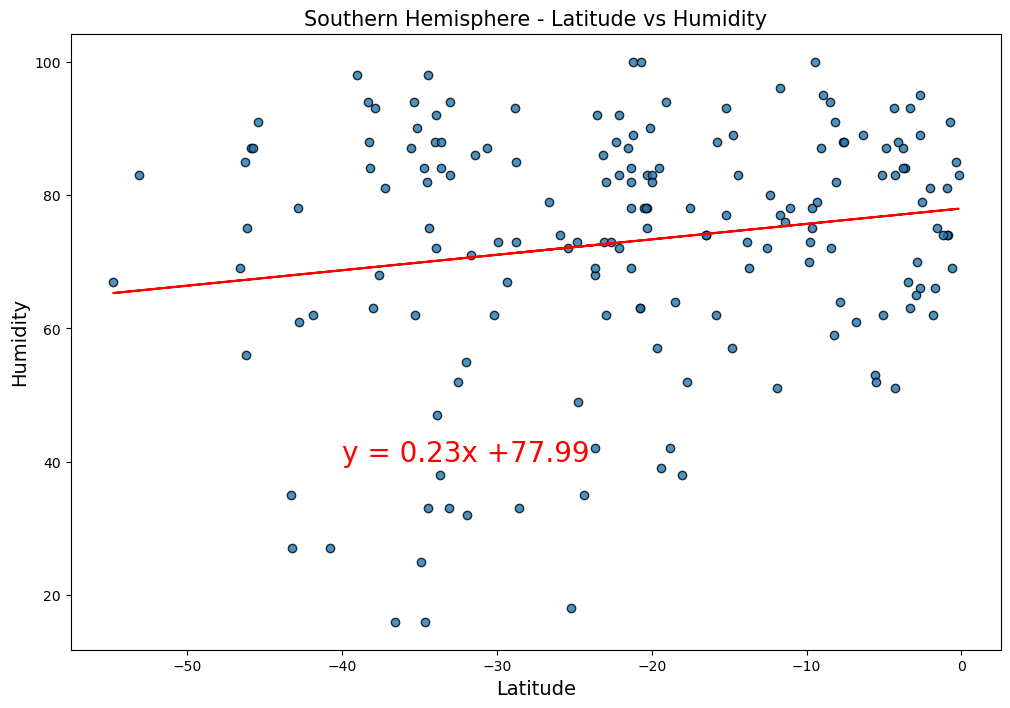

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression(x_values, y_values, "Latitude", "Humidity", "Southern",(-40, 40))
plt.savefig('output_data/Southhemi Latitude vs. Humidity.png')
plt.show()

**Discussion about the linear relationship:** Both the hemispheres have a weak correlation between latitude and humidity. Based on the diagrams it is tough to come to a conclusion further than that. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06988791605490872


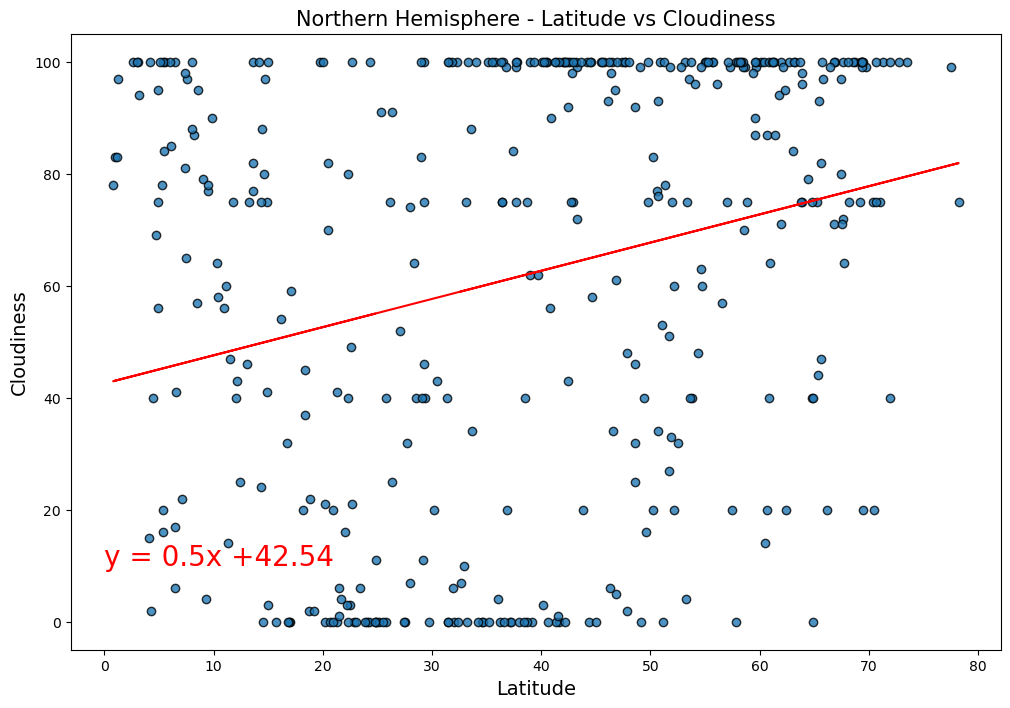

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern",(0, 10))
plt.savefig('output_data/Northhemi Latitude vs. Cloudiness.png')
plt.show()

The r-value is: 0.19257662604694722


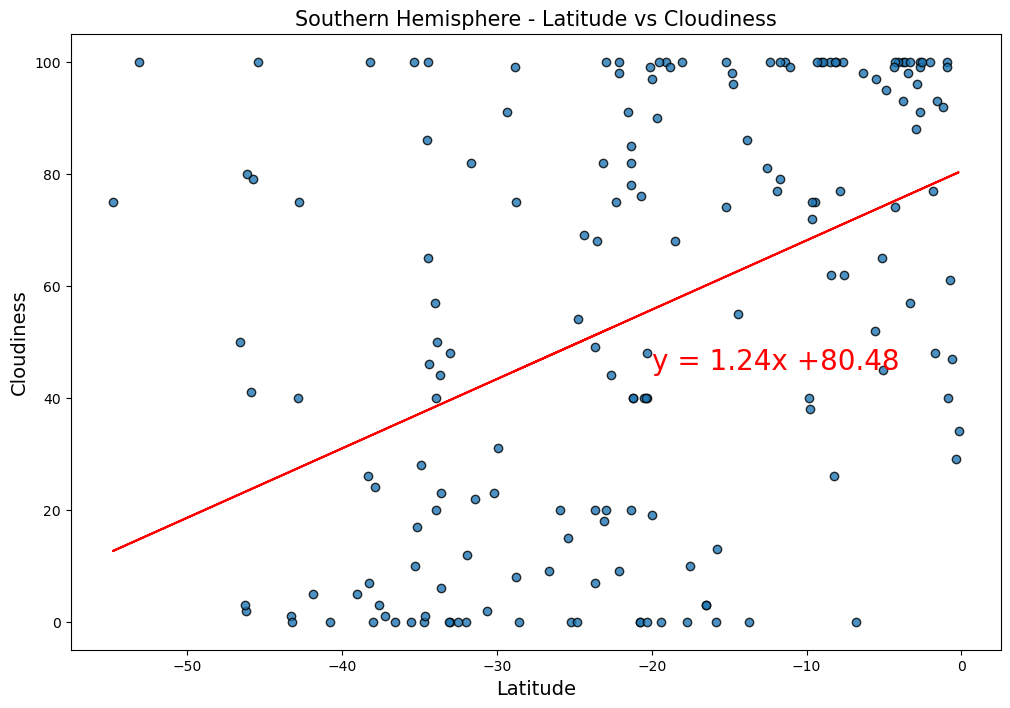

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Southern",(-20, 45))
plt.savefig('output_data/Southhemi Latitude vs. Cloudiness.png')
plt.show()

**Discussion about the linear relationship:** Both the hemispheres have a weak correlation between latitude and cloudiness. Based on the diagrams it is tough to come to a conclusion further than that. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0027253946391876133


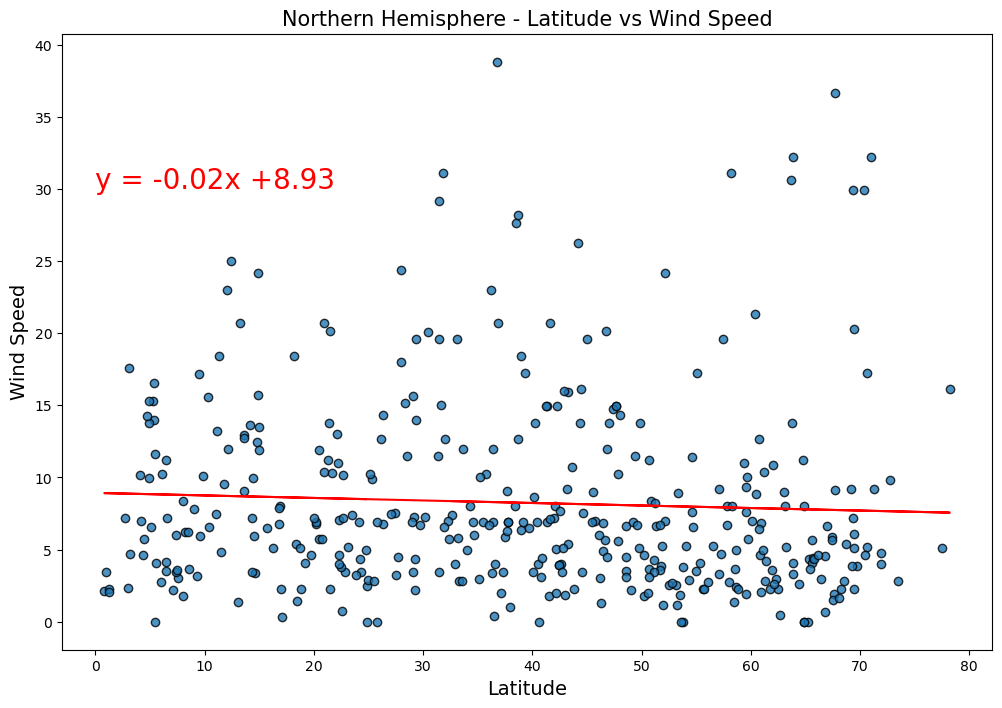

In [62]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern",(0, 30))
plt.savefig('output_data/Northhemi Latitude vs. Wind Speed.png')
plt.show()

The r-value is: 0.10901957948306118


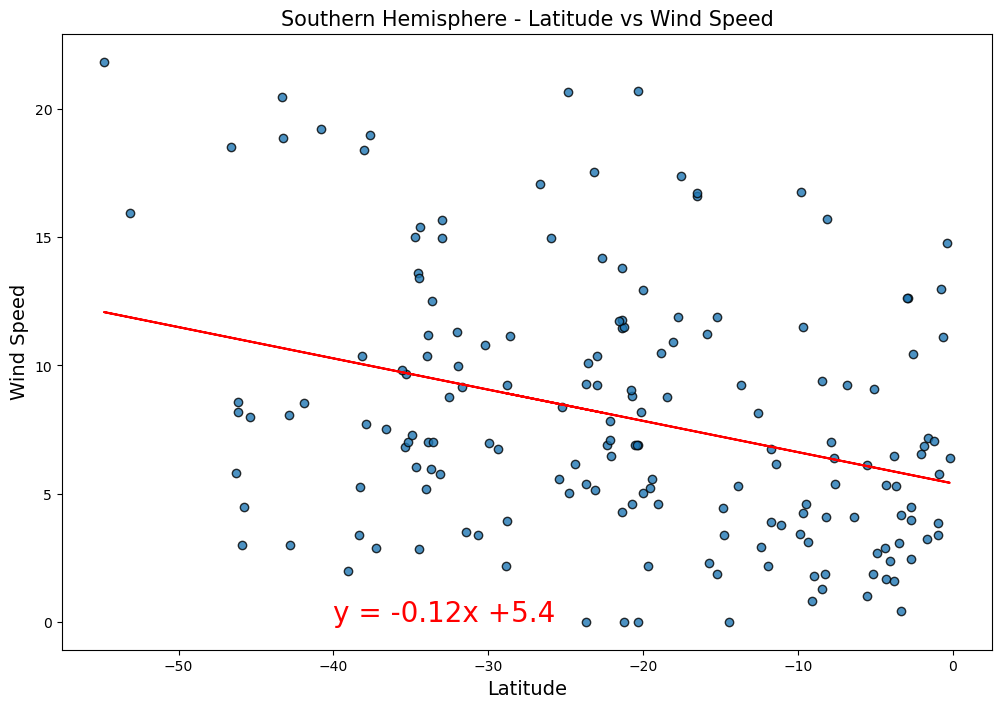

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Southern",(-40, 0))
plt.savefig('output_data/Southhemi Latitude vs. Wind Speed.png')
plt.show()

**Discussion about the linear relationship:** Both the hemispheres have a weak correlation between latitude and wind speed. Based on the diagrams it is tough to come to a conclusion further than that. 